In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
import sys

In [2]:
from sklearn.svm import SVC

In [54]:
nba_data=pd.read_csv('shot_logs.csv')
cols = ['FINAL_MARGIN','SHOT_NUMBER','PERIOD','DRIBBLES','TOUCH_TIME','SHOT_DIST','FGM']
nba_data=nba_data[cols]
X = nba_data.iloc[1:700, [1,2,3,4,5]].values
y = nba_data.iloc[1:700,6].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('green', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label='Made' if cl == 2 else 'Missed')



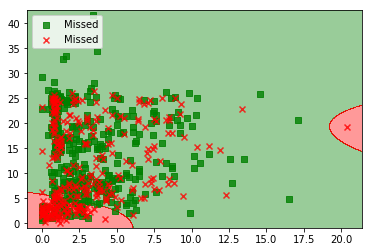

In [58]:
svm = SVC(degree=1,kernel='rbf', random_state=0,gamma=.01, C=4.0)
svm.fit(X_train, y_train)
plot_decision_regions(X,y,classifier=svm,test_idx=range(105,150))
plt.xlabel(' ')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

In [36]:
#finetuning using GridSearch
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},{'clf__C': param_range,'clf__gamma': param_range,'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X_train, y_train)

In [28]:
svm.score(X_test,y_test,sample_weight=None)

0.61428571428571432

In [29]:
svm.score(X_train,y_train,sample_weight=None)

0.78175313059033991

In [30]:
print(gs.best_score_)

0.629695885509839


In [31]:
print(gs.best_params_)

{'clf__C': 100.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


In [32]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.571
